# Third-order Ground-State Bleaching spectra of a dimer system

Importing useful classes, methods and modules:

In [1]:
from qudofedi import Qjob, FeynmanDiagram, System, PostProcess
from qutip import sigmax, sigmaz, sigmay, tensor, identity
from qiskit import Aer
import numpy as np

System parameters:

In [2]:
e_1 = 1.55                                   # Electronic energy gap for monomer 1 [eV]
e_2 = 1.46                                   # Electronic energy gap for monomer 2 [eV]
J = -0.01                                    # Exciton coupling [eV]
H = (- e_1 / 2 * tensor(sigmaz(), identity(2))
     - e_2 / 2 * tensor(identity(2), sigmaz())
     + J / 2 * ( tensor(sigmax(), sigmax())
                + tensor(sigmay(), sigmay()))
    )                                        # Hamiltonian of the dimer system [eV]

mu_1 = 1.                                    # Electric dipole moment for monomer 1 [a.u.]
mu_2 = 1.                                    # Electric dipole moment for monomer 2 [a.u.]

system = System(H, [mu_1, mu_2])             # System object

Spectroscopy parameters:

In [3]:
t_1_min = 0.                                 # Initial delay time (t1) [rad/eV]
t_1_max = 151.                               # Final delay time (t1) [rad/eV]
dt_1 = 15.                                   # Delta delay time (t1) [rad/eV]
t_1 = np.arange(t_1_min, t_1_max, dt_1)      # Delay time list (t1) [rad/eV]

t_2 = [0]                                    # Delay time list (t2) [rad/eV]

t_3_min = 0.                                 # Initial delay time (t3) [rad/eV]
t_3_max = 151.                               # Final delay time (t3) [rad/eV]
dt_3 = 15.                                   # Delta delay time (t3) [rad/eV]
t_3 = np.arange(t_3_min, t_3_max, dt_3)      # Delay time list (t3) [rad/eV]

t_list = [t_1, t_2, t_3]                     # List of delay times (t1, t2, t3) [rad/eV]

FD = FeynmanDiagram('gsb', t_list)           # FeynmanDiagram object

IBM Quantum backend:

In [4]:
backend = Aer.get_backend('qasm_simulator')

In [5]:
# from qiskit_ibm_provider import IBMProvider
# 
# provider = IBMProvider(instance='ibm-q/open/main')
# backend = provider.get_backend('ibmq_manila')

Create the Qjob object and getting the response function:

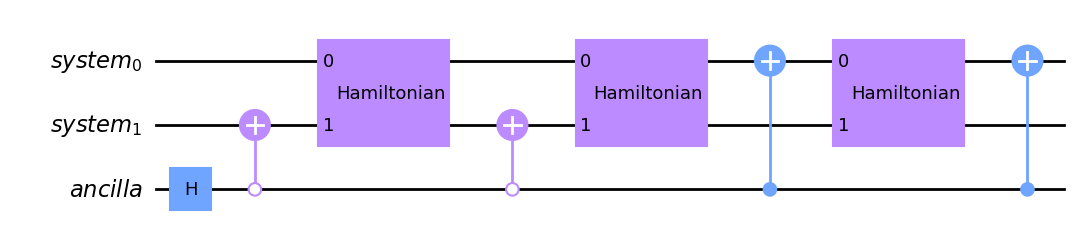

In [12]:
from qudofedi.quantumcomputing.circuits import ThirdOrderSpectroscopyCircuit

job = Qjob(system, FD)
third_order_circuit = ThirdOrderSpectroscopyCircuit('gsb', system)

third_order_circuit[0][3].draw(output='mpl')

In [6]:
job = Qjob(system, FD)                       # Qjob object

response = job.run(backend,
                   shots = 4000,
                   save_Qjob = True,
                   save_name = 'example_gsb_dimer',
                   save_checkpoint = True,
                  )                          # Run the simulation returning a numpy.ndarray with the results

Total number of circuits = 7744
Solved: 242/7744
Solved: 484/7744
Solved: 726/7744
Solved: 968/7744
Solved: 1210/7744
Solved: 1452/7744
Solved: 1694/7744
Solved: 1936/7744
Solved: 2178/7744
Solved: 2420/7744
Solved: 2662/7744
Solved: 2904/7744
Solved: 3146/7744
Solved: 3388/7744
Solved: 3630/7744
Solved: 3872/7744
Solved: 4114/7744
Solved: 4356/7744
Solved: 4598/7744
Solved: 4840/7744
Solved: 5082/7744
Solved: 5324/7744
Solved: 5566/7744
Solved: 5808/7744
Solved: 6050/7744
Solved: 6292/7744
Solved: 6534/7744
Solved: 6776/7744
Solved: 7018/7744
Solved: 7260/7744
Solved: 7502/7744
Solved: 7744/7744
File saved in /home/juu8242/GitHub/Quantum_Dynamics/test_qudofedi/example_gsb_dimer


Post-processing the results (rotating frame, exponential damping, zero-padding) to obtain the time oscillation and frequency spectra:

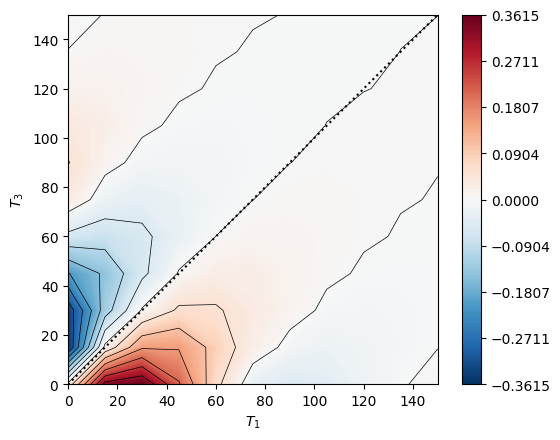

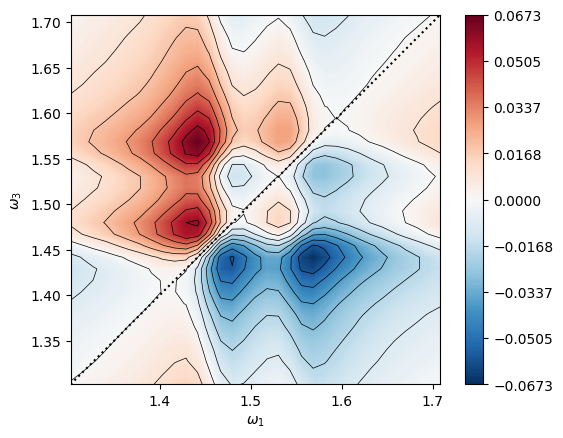

In [8]:
PostProcess(job,
            RF_freq = 1.505,
            damping_rate = 29.54 * 10**(-3),
            pad = 3,
           )                                 # Post-process and print the results

## Adding readout-error mitigation

In [ ]:
from qiskit.utils.mitigation import CompleteMeasFitter
from qiskit_ibm_provider import IBMProvider

Select a real quantum processor:

In [ ]:
provider = IBMProvider(instance='ibm-q/open/main')
real_backend = provider.get_backend('ibmq_manila')

Create the noise model (not necessary if using the real_backend as the backend of computation):

In [ ]:
from qiskit_aer.noise.noise_model import NoiseModel

noise_model = NoiseModel().from_backend(real_backend)

Create the Qjob object and getting the response function:

In [ ]:
job = Qjob(system, FD)                       # Qjob object

response = job.run(backend,
                   shots = 4000,
                   save_Qjob = True,
                   save_name = 'example_gsb_dimer_mitigation',
                   save_checkpoint = True,
                   noise_model = noise_model,
                   coupling_map = real_backend.configuration().coupling_map,
                   initial_layout = [0, 1, 2],    # An initial_layout specification is necessary to not get errors in Qiskit
                   measurement_error_mitigation_cls=CompleteMeasFitter,
                   measurement_error_mitigation_shots = 4000,
                  )                          # Run the simulation returning a numpy.ndarray with the results

In [ ]:
# For readout-error mitigation on a real device:
#
# job = Qjob(system, FD)                       # Qjob object
#
# response = job.run(backend,
#                    shots = 4000,
#                    save_Qjob = True,
#                    save_name = 'example_gsb_dimer_mitigation',
#                    save_checkpoint = True,
#                    initial_layout = [0, 1, 2],    # An initial_layout specification is necessary to not get errors in Qiskit
#                    measurement_error_mitigation_cls=CompleteMeasFitter,
#                    measurement_error_mitigation_shots = 4000,
#                   )                          # Run the simulation returning a numpy.ndarray with the results

Post-processing the results (rotating frame, exponential damping, zero-padding) to obtain the time oscillation and frequency spectra:

In [ ]:
PostProcess(job,
            RF_freq = 1.505,
            damping_rate = 29.54 * 10**(-3),
            pad = 3,
           )                                 # Post-process and print the results